In [1]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/ant_bee_images.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [2]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/ant_bee_images'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  394


Printing the name of images

In [3]:
file_names = os.listdir('/content/ant_bee_images')
print(file_names)

['ant (138).jpg', 'ant (92).jpg', 'bee (120).jpg', 'ant (41).jpg', 'bee (123).jpg', 'bee 123.jpg', 'bee (91).jpg', 'ant (190).jpg', 'ant (191).jpg', 'bee (9).jpg', 'bee (170).jpg', 'bee (22).jpg', 'bee (25).jpg', 'bee (96).jpg', 'ant (8).jpg', 'ant (37).jpg', 'bee (101).jpg', 'ant (76).jpg', 'ant 115.jpg', 'ant (185).jpg', 'bee 121.jpg', 'ant (44).jpg', 'bee (153).jpg', 'ant (146).jpg', 'bee 116.jpg', 'ant (17).jpg', 'bee (95).jpg', 'ant (167).jpg', 'bee (42).jpg', 'ant (47).jpg', 'ant (73).jpg', 'ant (20).jpg', 'bee (111).jpg', 'bee (41).jpg', 'ant (143).jpg', 'bee (17).jpg', 'ant (186).jpg', 'bee (63).jpg', 'ant (23).jpg', 'ant (72).jpg', 'bee 120.jpg', 'bee (86).jpg', 'ant (57).jpg', 'ant (187).jpg', 'ant (91).jpg', 'ant 104.jpg', 'ant (50).jpg', 'bee (103).jpg', 'ant (14).jpg', 'ant (90).jpg', 'ant (7).jpg', 'bee (84).jpg', 'ant (80).jpg', 'bee (146).jpg', 'bee (32).jpg', 'ant (52).jpg', 'ant (81).jpg', 'bee (40).jpg', 'ant (172).jpg', 'ant (32).jpg', 'bee (66).jpg', 'ant (137).jpg

Importing the Dependencies

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of babies with and without jaundice

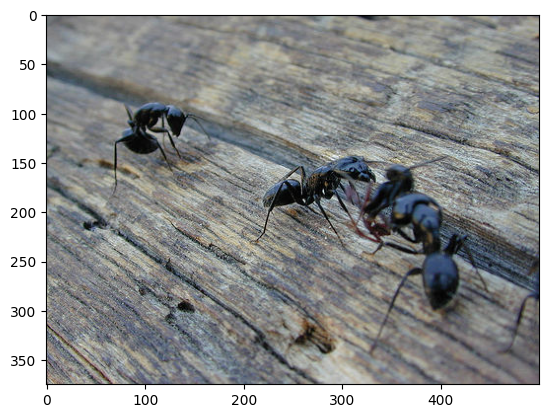

In [5]:
# display ant image
img = mpimg.imread('/content/ant_bee_images/ant (10).jpg')
imgplt = plt.imshow(img)
plt.show()

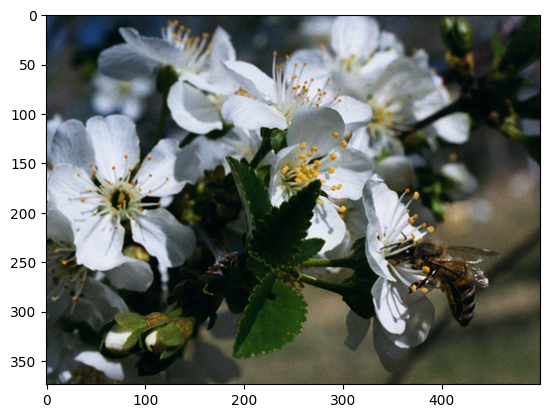

In [6]:
# display baby with jaundice
img = mpimg.imread('/content/ant_bee_images/bee (10).jpg')
imgplt = plt.imshow(img)
plt.show()

In [7]:
file_names = os.listdir('/content/ant_bee_images')

for i in range(5):

  name = file_names[i]
  print(name[0:3])



ant
ant
bee
ant
bee


In [8]:
file_names = os.listdir('/content/ant_bee_images')

ant_count = 0
bee_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'ant':
    ant_count += 1

  else:
    bee_count += 1

print('Number of ant images =', ant_count)
print('Number of bee images =', bee_count)

Number of ant images = 191
Number of bee images = 203


Resizing all the images

In [9]:
#creating a directory for resized images
os.mkdir('/content/ant_bee_images resized')

In [10]:
original_folder = '/content/ant_bee_images'
resized_folder = '/content/ant_bee_images resized/'

for i in range(394):

  filename = os.listdir(original_folder)[i]
  #print(filename)
  #print(original_folder + '/' + filename)
  #/content/Data/normal (989).jpg
  img_path = original_folder + '/' + filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder + '/' + filename
  img.save(newImgPath)

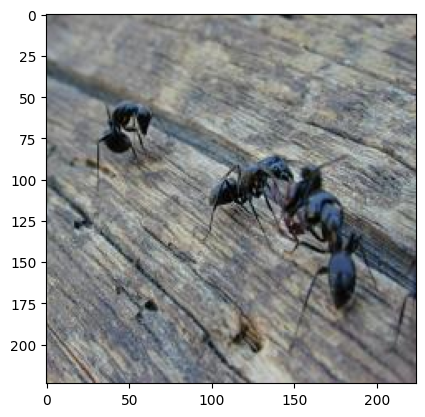

In [12]:
# display resized ant image
img = mpimg.imread('/content/ant_bee_images resized/ant (10).jpg')
imgplt = plt.imshow(img)
plt.show()

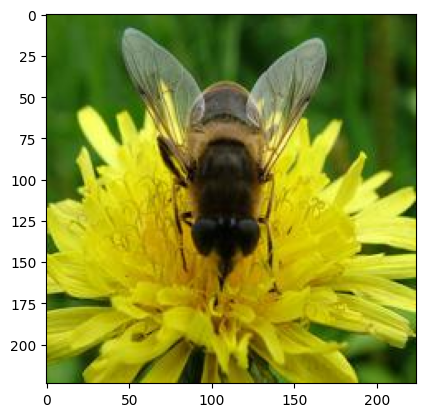

In [13]:
# display resized bee image
img = mpimg.imread('/content/ant_bee_images resized/bee (12).jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating labels for resized images of Ants and Bees**

ant --> 0

bee --> 1

In [14]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/ant_bee_images resized')


labels = []

for i in range(394):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'bee':
    labels.append(1)

  else:
    labels.append(0)

In [15]:
print(filenames[0:3])
print(len(filenames))

['ant (138).jpg', 'ant (92).jpg', 'bee (120).jpg']
394


In [16]:
print(labels[0:5])
print(len(labels))

[0, 0, 1, 0, 1]
394


In [17]:
# counting the images of ant and bee out of 243
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[191 203]


Converting all the resized images to numpy arrays

In [18]:
import cv2
import glob

In [19]:
image_directory = '/content/ant_bee_images resized/'
image_extension = ['jpg', 'jpeg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

ant_bee_images = np.asarray([cv2.imread(file) for file in files])

In [20]:
print(ant_bee_images)

[[[[ 34  43  52]
   [ 36  45  54]
   [ 49  58  67]
   ...
   [170 185 188]
   [180 195 198]
   [135 150 153]]

  [[ 60  69  78]
   [ 41  50  59]
   [ 37  46  55]
   ...
   [103 118 121]
   [140 154 160]
   [117 134 137]]

  [[ 66  73  82]
   [ 37  44  53]
   [ 71  78  87]
   ...
   [182 198 204]
   [122 138 145]
   [ 56  75  80]]

  ...

  [[110 124 136]
   [ 84 100 112]
   [152 166 178]
   ...
   [  0   6  39]
   [ 21  53  88]
   [ 32  64  99]]

  [[105 121 133]
   [130 148 159]
   [113 129 142]
   ...
   [ 88 122 158]
   [135 171 209]
   [118 154 192]]

  [[ 92 110 121]
   [ 93 111 122]
   [ 95 112 125]
   ...
   [171 207 243]
   [164 200 240]
   [130 166 206]]]


 [[[236 240 251]
   [236 240 251]
   [236 240 251]
   ...
   [236 245 254]
   [236 245 254]
   [236 245 254]]

  [[236 240 251]
   [236 240 251]
   [236 240 251]
   ...
   [236 245 254]
   [236 245 254]
   [236 245 254]]

  [[236 240 251]
   [236 240 251]
   [236 240 251]
   ...
   [236 245 254]
   [236 245 254]
   [236 245

In [21]:
type(ant_bee_images)

numpy.ndarray

In [22]:
print(ant_bee_images.shape)

(394, 224, 224, 3)


In [23]:
X = ant_bee_images
Y = np.asarray(labels)

**Train Test Split**

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(394, 224, 224, 3) (354, 224, 224, 3) (40, 224, 224, 3)


354 --> training images

40 --> test images

In [27]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [26]:
print(X_train_scaled)

[[[[0.17254902 0.24705882 0.18039216]
   [0.16470588 0.23921569 0.17254902]
   [0.15686275 0.23137255 0.16470588]
   ...
   [0.08235294 0.10980392 0.09019608]
   [0.07843137 0.10588235 0.08627451]
   [0.0745098  0.10196078 0.08235294]]

  [[0.17254902 0.24705882 0.18039216]
   [0.16470588 0.23921569 0.17254902]
   [0.15294118 0.22745098 0.16078431]
   ...
   [0.08627451 0.11372549 0.09411765]
   [0.07843137 0.10588235 0.08627451]
   [0.07843137 0.10588235 0.08627451]]

  [[0.16078431 0.24705882 0.17647059]
   [0.15686275 0.24313725 0.17254902]
   [0.14509804 0.23137255 0.16078431]
   ...
   [0.08627451 0.11372549 0.09411765]
   [0.0745098  0.11372549 0.09019608]
   [0.07058824 0.10980392 0.08627451]]

  ...

  [[0.0627451  0.12156863 0.09019608]
   [0.0627451  0.12156863 0.09019608]
   [0.07058824 0.12941176 0.09803922]
   ...
   [0.04313725 0.15686275 0.09411765]
   [0.04705882 0.14901961 0.09803922]
   [0.03921569 0.14117647 0.09019608]]

  [[0.0627451  0.12156863 0.09019608]
   [0.0

**Building the Neural Network**

In [28]:
import tensorflow as tf
import tensorflow_hub as hub

In [29]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=True)

In [30]:
num_of_classes = 2

#model = tf.keras.Sequential([

#    pretrained_model,
#    tf.keras.layers.Dense(num_of_classes)

#])

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 2430338 (9.27 MB)
Trainable params: 239622

In [31]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [32]:
# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

**Validation Data**

In [33]:
# extracting the compressed validation dataset
from zipfile import ZipFile

dataset = '/content/validation_data.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [34]:
# counting the number of files in val folder
path, dirs, files = next(os.walk('/content/validation_data'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  153


In [35]:
#creating a directory for resized images
os.mkdir('/content/validation_data resized')

In [36]:
original_val_folder = '/content/validation_data'
resized_val_folder = '/content/validation_data resized/'

for i in range(153):

  filename_val = os.listdir(original_val_folder)[i]
  #print(filename)
  #print(original_folder + '/' + filename)
  #/content/Data/normal (989).jpg
  val_img_path = original_val_folder + '/' + filename_val

  val_img = Image.open(img_path)
  val_img = val_img.resize((224, 224))
  val_img = val_img.convert('RGB')

  newImgPath_val = resized_val_folder + '/' + filename_val
  val_img.save(newImgPath_val)

In [37]:
# creaing a for loop to assign labels
filenames_val = os.listdir('/content/validation_data resized')

labels_val = []

for i in range(153):
  file_name_val = filenames_val[i]
  label_val = file_name_val[0:3]

  if label_val == 'bee':
    labels_val.append(1)

  else:
    labels_val.append(0)

In [38]:
# counting the val images of ant and bee out of 153
values, counts = np.unique(labels_val, return_counts=True)
print(values)
print(counts)

[0 1]
[70 83]


In [39]:
image_directory_val = '/content/validation_data resized/'
image_extension_val = ['jpg', 'jpeg']

files_val = []

[files_val.extend(glob.glob(image_directory_val + '*.' + e)) for e in image_extension_val]

ant_bee_images_val = np.asarray([cv2.imread(file) for file in files_val])

In [40]:
print(ant_bee_images_val)
print(type(ant_bee_images_val))
print(ant_bee_images_val.shape)

[[[[89 83 78]
   [87 81 76]
   [85 79 74]
   ...
   [80 75 72]
   [80 75 72]
   [80 75 72]]

  [[91 85 80]
   [90 84 79]
   [88 82 77]
   ...
   [80 75 72]
   [80 75 72]
   [80 75 72]]

  [[94 87 84]
   [93 86 83]
   [91 84 81]
   ...
   [80 75 72]
   [80 75 72]
   [80 75 72]]

  ...

  [[76 72 71]
   [75 71 70]
   [75 71 70]
   ...
   [86 81 80]
   [85 80 79]
   [84 79 78]]

  [[76 72 71]
   [76 72 71]
   [76 72 71]
   ...
   [87 82 81]
   [86 81 80]
   [85 80 79]]

  [[77 73 72]
   [77 73 72]
   [76 72 71]
   ...
   [88 83 82]
   [87 82 81]
   [86 81 80]]]


 [[[89 83 78]
   [87 81 76]
   [85 79 74]
   ...
   [80 75 72]
   [80 75 72]
   [80 75 72]]

  [[91 85 80]
   [90 84 79]
   [88 82 77]
   ...
   [80 75 72]
   [80 75 72]
   [80 75 72]]

  [[94 87 84]
   [93 86 83]
   [91 84 81]
   ...
   [80 75 72]
   [80 75 72]
   [80 75 72]]

  ...

  [[76 72 71]
   [75 71 70]
   [75 71 70]
   ...
   [86 81 80]
   [85 80 79]
   [84 79 78]]

  [[76 72 71]
   [76 72 71]
   [76 72 71]
   ...
   [8

In [41]:
X_val = ant_bee_images_val
Y_val = np.asarray(labels_val)

print(X_val.shape)
print(Y_val.shape)

(153, 224, 224, 3)
(153,)


In [42]:
X_train_val, X_test_val, Y_train_val, Y_test_val = train_test_split(X_val, Y_val, test_size=0.1, random_state=2)

In [43]:
print(X_val.shape, X_train_val.shape, X_test_val.shape)

(153, 224, 224, 3) (137, 224, 224, 3) (16, 224, 224, 3)


train data -> 137

test data -> 16

In [44]:
# scaling the data
X_train_val_scaled = X_train_val/255

X_test_val_scaled = X_test_val/255

In [45]:
print(X_train_val_scaled, X_test_val_scaled)

[[[[0.34901961 0.3254902  0.30588235]
   [0.34117647 0.31764706 0.29803922]
   [0.33333333 0.30980392 0.29019608]
   ...
   [0.31372549 0.29411765 0.28235294]
   [0.31372549 0.29411765 0.28235294]
   [0.31372549 0.29411765 0.28235294]]

  [[0.35686275 0.33333333 0.31372549]
   [0.35294118 0.32941176 0.30980392]
   [0.34509804 0.32156863 0.30196078]
   ...
   [0.31372549 0.29411765 0.28235294]
   [0.31372549 0.29411765 0.28235294]
   [0.31372549 0.29411765 0.28235294]]

  [[0.36862745 0.34117647 0.32941176]
   [0.36470588 0.3372549  0.3254902 ]
   [0.35686275 0.32941176 0.31764706]
   ...
   [0.31372549 0.29411765 0.28235294]
   [0.31372549 0.29411765 0.28235294]
   [0.31372549 0.29411765 0.28235294]]

  ...

  [[0.29803922 0.28235294 0.27843137]
   [0.29411765 0.27843137 0.2745098 ]
   [0.29411765 0.27843137 0.2745098 ]
   ...
   [0.3372549  0.31764706 0.31372549]
   [0.33333333 0.31372549 0.30980392]
   [0.32941176 0.30980392 0.30588235]]

  [[0.29803922 0.28235294 0.27843137]
   [0.2

In [52]:
# Train the model with validation and early stopping
history = model.fit(X_train_val_scaled, Y_train_val, epochs=20, validation_data=(X_test_val_scaled, Y_test_val), callbacks=[early_stopping])

Epoch 1/20
5/5 [==============================] - 27s 5s/step - loss: 0.8009 - acc: 0.5255 - val_loss: 0.8223 - val_acc: 0.5000
Epoch 2/20
5/5 [==============================] - 24s 5s/step - loss: 0.7821 - acc: 0.5766 - val_loss: 0.8141 - val_acc: 0.5000
Epoch 3/20
5/5 [==============================] - 25s 5s/step - loss: 0.7936 - acc: 0.4818 - val_loss: 0.8103 - val_acc: 0.5000
Epoch 4/20
5/5 [==============================] - 26s 5s/step - loss: 0.7962 - acc: 0.4672 - val_loss: 0.8068 - val_acc: 0.5000
Epoch 5/20
5/5 [==============================] - 24s 5s/step - loss: 0.7943 - acc: 0.4526 - val_loss: 0.7998 - val_acc: 0.5000
Epoch 6/20
5/5 [==============================] - 25s 5s/step - loss: 0.7906 - acc: 0.4818 - val_loss: 0.7964 - val_acc: 0.5000
Epoch 7/20
5/5 [==============================] - 26s 5s/step - loss: 0.7907 - acc: 0.5474 - val_loss: 0.7942 - val_acc: 0.5000
Epoch 8/20
5/5 [==============================] - 26s 5s/step - loss: 0.7900 - acc: 0.5620 - val_loss: 0

In [53]:
model.fit(X_train_scaled, Y_train, epochs=20)

Epoch 1/20
12/12 [==============================] - 65s 5s/step - loss: 0.8514 - acc: 0.5791
Epoch 2/20
12/12 [==============================] - 68s 6s/step - loss: 0.7557 - acc: 0.6328
Epoch 3/20
12/12 [==============================] - 63s 5s/step - loss: 0.7281 - acc: 0.6554
Epoch 4/20
12/12 [==============================] - 65s 5s/step - loss: 0.6687 - acc: 0.6836
Epoch 5/20
12/12 [==============================] - 63s 5s/step - loss: 0.6424 - acc: 0.7203
Epoch 6/20
12/12 [==============================] - 63s 5s/step - loss: 0.5658 - acc: 0.7994
Epoch 7/20
12/12 [==============================] - 64s 5s/step - loss: 0.5697 - acc: 0.8136
Epoch 8/20
12/12 [==============================] - 64s 5s/step - loss: 0.6132 - acc: 0.7571
Epoch 9/20
12/12 [==============================] - 62s 5s/step - loss: 0.5570 - acc: 0.8220
Epoch 10/20
12/12 [==============================] - 65s 5s/step - loss: 0.5282 - acc: 0.8051
Epoch 11/20
12/12 [==============================] - 64s 5s/step - lo

In [54]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

2/2 [==============================] - 1s 200ms/step - loss: 0.8339 - acc: 0.7250
Test Loss = 0.8338848948478699
Test Accuracy = 0.7250000238418579


**Predictive System**

Path of the image to be predicted: /content/test_bee.jpg


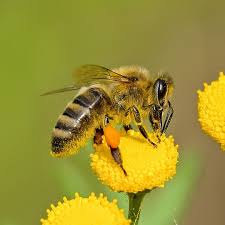

1/1 [==============================] - 0s 56ms/step
[[-3.5457406  5.4468164]]
1
The image represents a bee.


In [58]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents an ant.')

else:
  print('The image represents a bee.')

Path of the image to be predicted: /content/test_ant.jpg


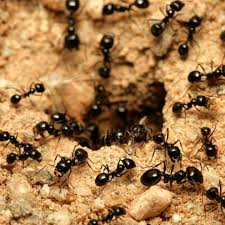

1/1 [==============================] - 0s 51ms/step
[[ 2.2256777  -0.27780887]]
0
The image represents an ant


In [61]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents an ant')

else:
  print('The image represents a bee')